In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sys import exit

def density(r):
    r1,r2 = r
    return np.exp(-10*np.power(r1*r1-r2,2)-np.power(r2-0.25,4))

def normal2(r,m1,m2):
    if (m2[0][1]!=m2[1][0]):
        print("Off diagonal elements are unequal.");
        exit();
    mu1 = m1[0];
    mu2 = m1[1];
    v1 = m2[0][0];
    v2 = m2[1][1];
    rho = m2[0][1]*1.0/np.sqrt(v1*v2);
    r1 = r[0];
    r2 = r[1];
    return np.exp((-1.0/(2.0*(1.0-rho*rho)))*(np.square(r1-mu1)/v1+np.square(r2-mu2)/v2-2*(r1-mu1)*(r2-mu2)/np.sqrt(v1*v2)))/(2*np.pi*np.sqrt(v1*v2*(1-rho*rho)))

r = np.array([-1,-1],dtype=float)
m1 = np.array([0,0],dtype=float);
m2 = np.array([[1,0],
               [0,1]])

itter = 2;
lam = 1.0;
piNew = 0.0;
piOld = density(r);
for i in range(1,itter):
    epsilon = lam*normal2(r,m1,m2);
    r += epsilon;
    piNew = density(r);
    

In [3]:
import numpy as np

# Define the target density
def pi(r):
    r1, r2 = r
    return np.exp(-10*(r1**2-r2)**2-(r2-0.25)**4)

# Define the proposal distribution
def q(r, r_next, scale):
    mean = r
    cov = np.eye(2)*scale
    return np.random.multivariate_normal.pdf(r_next, mean=mean, cov=cov)

# Define the Metropolis-Hastings acceptance probability
def acceptance_prob(r, r_next, scale):
    return min(1, pi(r_next)/pi(r) * q(r, r_next, scale)/q(r_next, r, scale))

# Initialize the chain
r = np.array([-1, -1])

# Generate samples
n_samples = int(1e4)
burn_in = 1000
samples_01 = np.zeros((n_samples, 2))
samples_1 = np.zeros((n_samples, 2))
samples_100 = np.zeros((n_samples, 2))
for i in range(n_samples):
    # Generate proposal
    r_next_01 = np.random.normal(r, 0.01)
    r_next_1 = np.random.normal(r, 1)
    r_next_100 = np.random.normal(r, 100)
    
    # Compute acceptance probability
    alpha_01 = acceptance_prob(r, r_next_01, 0.01)
    alpha_1 = acceptance_prob(r, r_next_1, 1)
    alpha_100 = acceptance_prob(r, r_next_100, 100)
    
    # Accept or reject proposal
    if np.random.uniform() < alpha_01:
        r = r_next_01
    if np.random.uniform() < alpha_1:
        r = r_next_1
    if np.random.uniform() < alpha_100:
        r = r_next_100
    
    # Save sample
    if i >= burn_in:
        samples_01[i-burn_in] = r_next_01
        samples_1[i-burn_in] = r_next_1
        samples_100[i-burn_in] = r_next_100

# Print MC estimate of mean and variance
print('lambda = 0.01')
print('Mean: ', np.mean(samples_01, axis=0))
print('Var: ', np.var(samples_01, axis=0))

print('lambda = 1')
print('Mean: ', np.mean(samples_1, axis=0))
print('Var: ', np.var(samples_1, axis=0))



AttributeError: 'builtin_function_or_method' object has no attribute 'pdf'

In [4]:
import numpy as np

# Define the target distribution pi
def pi(r):
    return np.exp(-10*(r[0]**2 - r[1])**2 - (r[1] - 0.25)**4)

# Define the proposal distribution q
def q(r_prime, r, scale):
    return np.exp(-0.5*np.sum(((r_prime - r)/scale)**2)) / (2*np.pi*scale**2)

# Set the number of iterations
n_iter = 10**4

# Set the scaling parameters
scales = [0.01, 1, 100]

# Initialize the chain
r_init = np.array([-1, -1])
r_current = r_init

# Initialize the acceptance counters
accept_counters = [0]*len(scales)

# Initialize the samples matrix
samples = np.zeros((n_iter, 2, len(scales)))

# Implement the Metropolis algorithm
for i in range(n_iter):
    for j, scale in enumerate(scales):
        # Generate a proposal
        r_proposal = np.random.normal(r_current, scale, size=2)
        
        # Compute the acceptance probability
        alpha = min(1, pi(r_proposal)/pi(r_current) * q(r_current, r_proposal, scale) / q(r_proposal, r_current, scale))
        
        # Decide whether to accept the proposal
        if np.random.uniform() < alpha:
            r_current = r_proposal
            accept_counters[j] += 1
        
        # Record the sample
        samples[i,:,j] = r_current

# Compute the acceptance rates
accept_rates = [accept_counters[j]/n_iter for j in range(len(scales))]

# Print the acceptance rates
print("Acceptance rates:", accept_rates)

# Compute the Monte Carlo estimates
mc_estimates = [np.mean(samples[:,:,j], axis=0) for j in range(len(scales))]

# Print the Monte Carlo estimates
print("MC estimates:", mc_estimates)


Acceptance rates: [0.9801, 0.1543, 0.0001]
MC estimates: [array([0.06154912, 0.35083465]), array([0.06154482, 0.35108057]), array([0.06156769, 0.35103994])]


In [23]:
import numpy as np

# Define the target distribution pi
def pi(r):
    r1,r2 = r
    return np.exp(-10*np.power(r1*r1-r2,2)-np.power(r2-0.25,4))

# Define the proposal distribution q
def q(r_prime, r, scale):
    return np.exp(-0.5*np.sum(((r_prime - r)/scale)**2)) / (2*np.pi*scale**2)

# Set the number of iterations
n_iter = 10**4

# Set the scaling parameters
scales = [0.01, 1, 100]

# Initialize the chain
r_init = np.array([-1, -1])
r_current = r_init

# Initialize the acceptance counters
accept_counters = [0]*len(scales)

# Initialize the samples matrix
samples = np.zeros((n_iter, 2, len(scales)))

# Implement the Metropolis algorithm
for i in range(n_iter):
    for j, scale in enumerate(scales):
        # Generate a proposal
        r_proposal = np.random.normal(r_current, scale, size=2)
        
        # Compute the acceptance probability
        alpha = min(1, pi(r_proposal)/pi(r_current) * q(r_current, r_proposal, scale) / q(r_proposal, r_current, scale))
        
        # Decide whether to accept the proposal
        if np.random.uniform() < alpha:
            r_current = r_proposal
            accept_counters[j] += 1
        
        # Record the sample
        samples[i,:,j] = r_current

# Compute the acceptance rates
accept_rates = [accept_counters[j]/n_iter for j in range(len(scales))]

# Print the acceptance rates
print("Acceptance rates:", accept_rates)

# Compute the Monte Carlo estimates
mc_estimates = [np.mean(samples[:,:,j], axis=0) for j in range(len(scales))]

# Print the Monte Carlo estimates
print("MC estimates:", mc_estimates)


Acceptance rates: [0.9793, 0.1561, 0.0001]
MC estimates: [array([0.07292513, 0.41511007]), array([0.07313598, 0.41513925]), array([0.07302964, 0.41515699])]


# My try

In [99]:
import numpy as np

def pi(r):
    r1,r2=r;
    return np.exp(-10*np.power(r1*r1-r2,2)-np.power(r2-0.25,4));

def normal2(r,m1,m2):
    if (m2[0][1]!=m2[1][0]):
        print("Off diagonal elements are unequal.");
        exit();
    mu1 = m1[0];
    mu2 = m1[1];
    v1 = m2[0][0];
    v2 = m2[1][1];
    rho = m2[0][1]*1.0/np.sqrt(v1*v2);
    r1 = r[0];
    r2 = r[1];
    return np.exp((-1.0/(2.0*(1.0-rho*rho)))*(np.square(r1-mu1)/v1+np.square(r2-mu2)/v2-2*(r1-mu1)*(r2-mu2)/np.sqrt(v1*v2)))/(2*np.pi*np.sqrt(v1*v2*(1-rho*rho)))
    

lam = 1;
rold = np.array([-1,-1],dtype=float)
m1 = np.array([0,0],dtype=float);
m2 = np.array([[1,0],
               [0,1]])

itter = 10000;
lam = 1.0;
piNew = 0.0;
piOld = pi(r);
accept=np.array([0,0],dtype=int);

for i in range(itter):
    rand = np.random.uniform();
#     if rand >0.5:
#         lam*=-1.0
    epsilon = lam*normal2(r,m1,m2);
    rnew = rold + epsilon;
    alpha1 = pi([rnew[0],rold[1]])/pi(rold);
    alpha2 = pi(rnew)/pi(rold);
    if rand < alpha1:
        rold[0] = rnew[0];
        accept[0]+=1;
    if rand < alpha2:
        rold[1] = rnew[1];
        accept[1]+=1;

print("Final MC R = ",rold);
print("Acceptance rate = ",accept/itter)

Final MC R =  [1.54647909 1.70563403]
Acceptance rate =  [0.0016 0.0017]


Acceptance rate: 0.16119
MC estimates: [0.0095809  0.39785907]


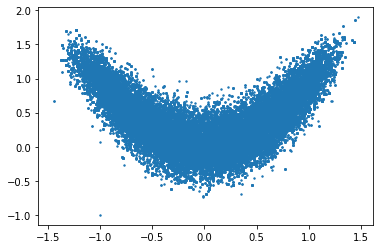

In [97]:
import numpy as np
import matplotlib.pyplot as plt

# Define the target distribution pi
def pi(r):
    return np.exp(-10*(r[0]**2 - r[1])**2 - (r[1] - 0.25)**4)

# Set the number of iterations
n_iter = 10000

# Set the standard deviation of the proposal distribution
scale = 1

# Initialize the chain
r_current = [-1,-1]

# Initialize the acceptance counter
accept_counter = 0

# Initialize the samples matrix
samples = np.zeros((n_iter, 2))

# Implement the Metropolis algorithm
for i in range(n_iter):
    # Generate a proposal
    r_proposal = np.random.normal(r_current, scale, size=2)
    
    # Compute the acceptance probability
    alpha = min(1, pi(r_proposal)/pi(r_current))
    
    # Decide whether to accept the proposal
    if np.random.uniform() < alpha:
        r_current = r_proposal
        accept_counter += 1
    
    # Record the sample
    samples[i,:] = r_current

# Compute the acceptance rate
accept_rate = accept_counter/n_iter

# Print the acceptance rate
print("Acceptance rate:", accept_rate)

# Compute the Monte Carlo estimates
mc_estimate = np.mean(samples, axis=0)

# Print the Monte Carlo estimates
print("MC estimates:", mc_estimate)

# Plot the samples
plt.scatter(samples[:,0], samples[:,1], s=2)
plt.show()
